# Import packages

In [13]:
import sys
import os
import io
import yfinance as yf  # For stock data
import pandas as pd    # For data manipulation
import numpy as np     # For numerical operations
import datetime
from datetime import timedelta
#!pip install tabulate
from tabulate import tabulate


import matplotlib.pyplot as plt  # For visualizations
#!pip install statsmodels
import statsmodels.api as sm

import importlib

# Get credentials

In [36]:
#!pip install google-auth
#!pip install google-api-python-client
#!pip install openpyxl

In [73]:
try:
    importlib.reload(sys.modules['integrations.gd_connection'])
    importlib.reload(sys.modules['helpers.get_conns_str'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from helpers.get_conns_str import getConnsStr

getconnsstr = getConnsStr(app = 'trading', app_environment = 'PROD')
getconnsstr.run()
outputs_dict = getconnsstr.outputs_dict
conns_str = outputs_dict['conns_str']
conns_str


2025-09-29 15:38:11,194 - helpers.additional_functionalities - INFO - WU-> Function (getConnsStr.run) start!)
2025-09-29 15:38:11,195 - helpers.additional_functionalities - INFO - WU-> Function (getConnsStr.get_connection_app_info) start!)
2025-09-29 15:38:11,196 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.run) start!)
2025-09-29 15:38:11,196 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.get_service) start!)
2025-09-29 15:38:11,248 - googleapiclient.discovery_cache - INFO - file_cache is only supported with oauth2client<4.0.0
2025-09-29 15:38:11,253 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.get_service) processed! (elapsed minutes: 0.001)
2025-09-29 15:38:11,253 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.run) processed! (elapsed minutes: 0.001)
2025-09-29 15:38:11,253 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.download_excel_file) start

{'predictive': {'host': 'ep-odd-pond-a48rwlfx-pooler.us-east-1.aws.neon.tech',
  'database': 'verceldb',
  'user': 'default',
  'password': '6JmKPbBD5gRY',
  'port': 5432},
 'predictive_storage': {'host': 'ep-odd-pond-a48rwlfx-pooler.us-east-1.aws.neon.tech',
  'database': 'verceldb',
  'user': 'default',
  'password': '6JmKPbBD5gRY',
  'port': 5432}}

In [74]:
outputs_dict.keys()

dict_keys(['fcredentials_df', 'connections_ls', 'conns_str', 'env_file', 'env_ls'])

# Import stock data

In [76]:
try:
    importlib.reload(sys.modules['data.api_get_sp500_15m'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from data.api_get_sp500_15m import apiGetStockData

apigetstockdata = apiGetStockData()
apigetstockdata.run()

outputs2_dict = apigetstockdata.outputs_dict
data_e2_df = outputs2_dict['data_e2_df'].copy()

outputs_dict['data_e2_df'] = outputs2_dict['data_e2_df'].copy()

data_e2_df

/home/user/Documents/airflow_predictive/dags/src/trading/data/api_get_sp500_15m.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = stock_df.reset_index()
[*********************100%***********************]  1 of 1 completed
2025-09-29 15:39:03,994 - data.api_get_sp500_15m - INFO - 
WU -> Stock market data: (1560, 7)
2025-09-29 15:39:04,008 - data.api_get_sp500_15m - INFO - 
WU -> Last reported dates into the data:
          Date  candles              min_datetime              max_datetime  \
53  2025-09-19       26 2025-09-19 13:30:00+00:00 2025-09-19 19:45:00+00:00   
54  2025-09-22       26 2025-09-22 13:30:00+00:00 2025-09-22 19:45:00+00:00   
55  2025-09-23       26 2025-09-23 13:30:00+00:00 2025-09-23 19:45:00+00:00   
56  2025-09-24       26 2025-09-24 13:30:00+00:00 2025-09-24 19:45:00+00:00   
57  2025-09-25       26 2025-09-25 13:30:00+00:00 2025-09-25 19:45:00+00:00   
58  2025-09-26       26 2025-09-26 13:30:00+00:00 2025-09-26 1

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj
0,0,2025-07-07 13:30:00+00:00,6256.799805,6261.899902,6250.399902,6259.040039,83242768,2025-07-07,1330,NaN
1,1,2025-07-07 13:45:00+00:00,6258.640137,6262.069824,6253.220215,6256.850098,108076830,2025-07-07,1345,6256.799805
2,2,2025-07-07 14:00:00+00:00,6250.839844,6260.009766,6250.100098,6258.810059,106089089,2025-07-07,1400,6258.640137
3,3,2025-07-07 14:15:00+00:00,6252.379883,6256.319824,6248.220215,6250.600098,93438723,2025-07-07,1415,6250.839844
4,4,2025-07-07 14:30:00+00:00,6249.000000,6252.830078,6247.629883,6252.430176,81115742,2025-07-07,1430,6252.379883
...,...,...,...,...,...,...,...,...,...,...
1555,1555,2025-09-29 18:45:00+00:00,6658.689941,6660.330078,6657.580078,6658.259766,78217000,2025-09-29,1845,6658.279785
1556,1556,2025-09-29 19:00:00+00:00,6650.479980,6658.810059,6649.959961,6658.750000,83195000,2025-09-29,1900,6658.689941
1557,1557,2025-09-29 19:15:00+00:00,6651.359863,6653.669922,6644.490234,6650.509766,90601000,2025-09-29,1915,6650.479980
1558,1558,2025-09-29 19:30:00+00:00,6657.979980,6659.390137,6651.479980,6651.500000,112638000,2025-09-29,1930,6651.359863


# Saves stock data

In [77]:
try:
    importlib.reload(sys.modules['delivers.stockdata_todb'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from delivers.stockdata_todb import stockDataToDb

params_dict = {}
params_dict['stock_desc'] = 'sp500_15m'

stockdatatodb = stockDataToDb(
    inputs_dict = outputs_dict, 
    params_dict = params_dict
)

stockdatatodb.run()

2025-09-29 15:41:11,138 - helpers.additional_functionalities - INFO - WU-> Function (stockDataToDb.run) start!)
2025-09-29 15:41:11,170 - delivers.stockdata_todb - INFO - WU -> Stocks Datetime currently worked: (1560, 10)
2025-09-29 15:41:11,173 - delivers.stockdata_todb - INFO - WU -> Stocks to be updated: (1560, 10)
2025-09-29 15:41:11,175 - delivers.stockdata_todb - INFO - WU -> Registers to be updated in Stocks: 1560
2025-09-29 15:41:11,176 - helpers.additional_functionalities - INFO - WU-> Function (postgresConnection.run) start!)
2025-09-29 15:41:14,324 - helpers.additional_functionalities - INFO - WU-> Function (postgresConnection.run) processed! (elapsed minutes: 0.052)
2025-09-29 15:41:14,328 - delivers.stockdata_todb - INFO - WU -> new pandas version detected!
2025-09-29 15:41:14,835 - delivers.stockdata_todb - INFO - WU -> Query excecution success!
2025-09-29 15:41:14,838 - delivers.stockdata_todb - INFO - WU -> Stocks deleted from (sp500_15m): 1560
2025-09-29 15:41:14,839 -

# Load stock data

In [72]:
try:
    importlib.reload(sys.modules['data.stkdb_get_sp500_15m_hist'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from data.stkdb_get_sp500_15m_hist import getSp50015mHist

getsp50015mhist = getSp50015mHist(conns_str = conns_str)
getsp50015mhist.run()
stock_df = getsp50015mhist.stock_df.copy()
outputs_dict['data_e2_df'] = stock_df.copy()

data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

2025-09-29 15:24:43,112 - helpers.additional_functionalities - INFO - WU-> Function (getSp50015mHist.run) start!)
2025-09-29 15:24:43,116 - helpers.additional_functionalities - INFO - WU-> Function (getSp50015mHist.getdata) start!)
2025-09-29 15:24:43,120 - helpers.additional_functionalities - INFO - WU-> Function (getSp50015mHist.getdata2) start!)
2025-09-29 15:24:43,122 - helpers.additional_functionalities - INFO - WU-> Function (postgresConnection.run) start!)
2025-09-29 15:24:45,128 - helpers.additional_functionalities - INFO - WU-> Function (postgresConnection.run) processed! (elapsed minutes: 0.033)
2025-09-29 15:24:46,080 - data.stkdb_get_sp500_15m_hist - INFO - WU -> OBSERVED INFO FOR (getSp50015mHist): (1560, 11) #####
2025-09-29 15:24:46,084 - helpers.additional_functionalities - INFO - WU-> Function (getSp50015mHist.getdata2) processed! (elapsed minutes: 0.049)
2025-09-29 15:24:46,086 - data.stkdb_get_sp500_15m_hist - INFO - WU -> Columns found:
2025-09-29 15:24:46,087 - dat

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,created_at
0,0,2025-07-07 13:30:00+00:00,6256.799805,6261.899902,6250.399902,6259.040039,83242768,2025-07-07,1330,NaN,2025-09-29 15:13:31.250160
1,1,2025-07-07 13:45:00+00:00,6258.640137,6262.069824,6253.220215,6256.850098,108076830,2025-07-07,1345,6256.799805,2025-09-29 15:13:31.250160
2,2,2025-07-07 14:00:00+00:00,6250.839844,6260.009766,6250.100098,6258.810059,106089089,2025-07-07,1400,6258.640137,2025-09-29 15:13:31.250160
3,3,2025-07-07 14:15:00+00:00,6252.379883,6256.319824,6248.220215,6250.600098,93438723,2025-07-07,1415,6250.839844,2025-09-29 15:13:31.250160
4,4,2025-07-07 14:30:00+00:00,6249.000000,6252.830078,6247.629883,6252.430176,81115742,2025-07-07,1430,6252.379883,2025-09-29 15:13:31.250160
...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,2025-09-29 18:45:00+00:00,6658.689941,6660.330078,6657.580078,6658.259766,78217000,2025-09-29,1845,6658.279785,2025-09-29 15:13:31.250160
1556,1556,2025-09-29 19:00:00+00:00,6650.479980,6658.810059,6649.959961,6658.750000,83195000,2025-09-29,1900,6658.689941,2025-09-29 15:13:31.250160
1557,1557,2025-09-29 19:15:00+00:00,6651.359863,6653.669922,6644.490234,6650.509766,90601000,2025-09-29,1915,6650.479980,2025-09-29 15:13:31.250160
1558,1558,2025-09-29 19:30:00+00:00,6657.979980,6659.390137,6651.479980,6651.500000,112638000,2025-09-29,1930,6651.359863,2025-09-29 15:13:31.250160


# Compute indicators

In [67]:
try:
    importlib.reload(sys.modules['logics.compute_strategies_indicators'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.compute_strategies_indicators import computeStrategiesIndicators


strategy = 'sp500_15m'
computestrategiessndicators = computeStrategiesIndicators(strategy = strategy, inputs_dict = outputs_dict)
computestrategiessndicators.run()

outputs_dict = computestrategiessndicators.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

2025-09-29 15:17:55,420 - logics.compute_strategies_indicators - INFO - 
WU -> Report of differences with SMA1:
    sma1_diff_bucket    min_diff   max_diff   avg_diff  frequence
0                  0 -145.230752 -36.598330 -69.261366        133
1                  1  -36.290073 -12.690669 -23.692367        133
2                  2  -12.602974  -4.000200  -8.321850        133
3                  3   -3.863491   6.392813   1.240905        132
4                  4    6.520244  16.501592  11.879798        133
5                  5   16.538057  23.689233  19.900751        133
6                  6   23.780947  30.487246  26.938181        133
7                  7   30.527441  37.323491  33.821063        132
8                  8   37.383325  45.921914  41.554208        133
9                  9   45.975596  53.497100  49.118659        133
10                10   53.500825  92.424219  60.834021        133

2025-09-29 15:17:56,143 - logics.compute_strategies_indicators - INFO - 
WU -> Report of slopes

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,SMA1,SMA2,current_return,sma1_diff,slope1,slope2,tendency,acceleration
0,0,2025-07-07 13:30:00+00:00,6256.799805,6261.899902,6250.399902,6259.040039,83242768,2025-07-07,1330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,2025-07-07 13:45:00+00:00,6258.640137,6262.069824,6253.220215,6256.850098,108076830,2025-07-07,1345,6256.799805,NaN,NaN,0.000294,NaN,NaN,NaN,0,0
2,2,2025-07-07 14:00:00+00:00,6250.839844,6260.009766,6250.100098,6258.810059,106089089,2025-07-07,1400,6258.640137,NaN,NaN,-0.001246,NaN,NaN,NaN,0,0
3,3,2025-07-07 14:15:00+00:00,6252.379883,6256.319824,6248.220215,6250.600098,93438723,2025-07-07,1415,6250.839844,NaN,NaN,0.000246,NaN,-2.106006,NaN,0,0
4,4,2025-07-07 14:30:00+00:00,6249.000000,6252.830078,6247.629883,6252.430176,81115742,2025-07-07,1430,6252.379883,NaN,NaN,-0.000541,NaN,-2.738037,-2.185986,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,2025-09-29 18:45:00+00:00,6658.689941,6660.330078,6657.580078,6658.259766,78217000,2025-09-29,1845,6658.279785,6633.018589,6647.444387,0.000062,25.671353,-0.077100,0.733936,-1,1
1556,1556,2025-09-29 19:00:00+00:00,6650.479980,6658.810059,6649.959961,6658.750000,83195000,2025-09-29,1900,6658.689941,6632.912290,6647.474888,-0.001233,17.567690,-2.934961,-1.723047,-2,2
1557,1557,2025-09-29 19:15:00+00:00,6651.359863,6653.669922,6644.490234,6650.509766,90601000,2025-09-29,1915,6650.479980,6632.856787,6647.551238,0.000132,18.503076,-2.896973,-2.587988,-2,-1
1558,1558,2025-09-29 19:30:00+00:00,6657.979980,6659.390137,6651.479980,6651.500000,112638000,2025-09-29,1930,6651.359863,6632.850586,6647.657087,0.000995,25.129395,-0.125000,-0.792969,-2,-2


# Strategy implementation

In [68]:
try:
    importlib.reload(sys.modules['logics.strategies_implementation'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.strategies_implementation import strategiesImplementation


strategy = 'sp500_15m'
strategiesimplementation = strategiesImplementation(strategy = strategy, inputs_dict = outputs_dict)
strategiesimplementation.run()

outputs_dict = strategiesimplementation.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,open_price,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,pp_strategy_gain
0,0,2025-07-07 13:30:00+00:00,6256.799805,6261.899902,6250.399902,6259.040039,83242768,2025-07-07,1330,NaN,...,0.000000,0,1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,1,2025-07-07 13:45:00+00:00,6258.640137,6262.069824,6253.220215,6256.850098,108076830,2025-07-07,1345,6256.799805,...,0.000000,0,2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,2,2025-07-07 14:00:00+00:00,6250.839844,6260.009766,6250.100098,6258.810059,106089089,2025-07-07,1400,6258.640137,...,0.000000,0,3,-0.0,0.0,0.000000,0.000000,-0.0,0.000000,0.000000
3,3,2025-07-07 14:15:00+00:00,6252.379883,6256.319824,6248.220215,6250.600098,93438723,2025-07-07,1415,6250.839844,...,0.000000,0,4,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,4,2025-07-07 14:30:00+00:00,6249.000000,6252.830078,6247.629883,6252.430176,81115742,2025-07-07,1430,6252.379883,...,0.000000,0,5,-0.0,0.0,0.000000,0.000000,-0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,2025-09-29 18:45:00+00:00,6658.689941,6660.330078,6657.580078,6658.259766,78217000,2025-09-29,1845,6658.279785,...,6655.040039,237,5,0.0,0.0,5.359863,-2.120117,0.0,3.239746,0.000487
1556,1556,2025-09-29 19:00:00+00:00,6650.479980,6658.810059,6649.959961,6658.750000,83195000,2025-09-29,1900,6658.689941,...,6655.040039,237,6,-0.0,-0.0,5.359863,-2.120117,-0.0,3.239746,0.000487
1557,1557,2025-09-29 19:15:00+00:00,6651.359863,6653.669922,6644.490234,6650.509766,90601000,2025-09-29,1915,6650.479980,...,6655.040039,237,7,0.0,0.0,5.359863,-2.120117,0.0,3.239746,0.000487
1558,1558,2025-09-29 19:30:00+00:00,6657.979980,6659.390137,6651.479980,6651.500000,112638000,2025-09-29,1930,6651.359863,...,6655.040039,237,8,0.0,0.0,5.359863,-2.120117,0.0,3.239746,0.000487


In [69]:
data_e2_df.value_counts(['signal'])

signal
0         809
1         751
Name: count, dtype: int64

# Performance metrics

2025-09-29 15:18:03,459 - logics.performance_metrics - INFO - 
WU -> Data for compute performance of strategy:
(1453, 29)

2025-09-29 15:18:03,493 - logics.performance_metrics - INFO - WU ->
Total Strategy Return: 10.31%
Total Market Return: 6.46%



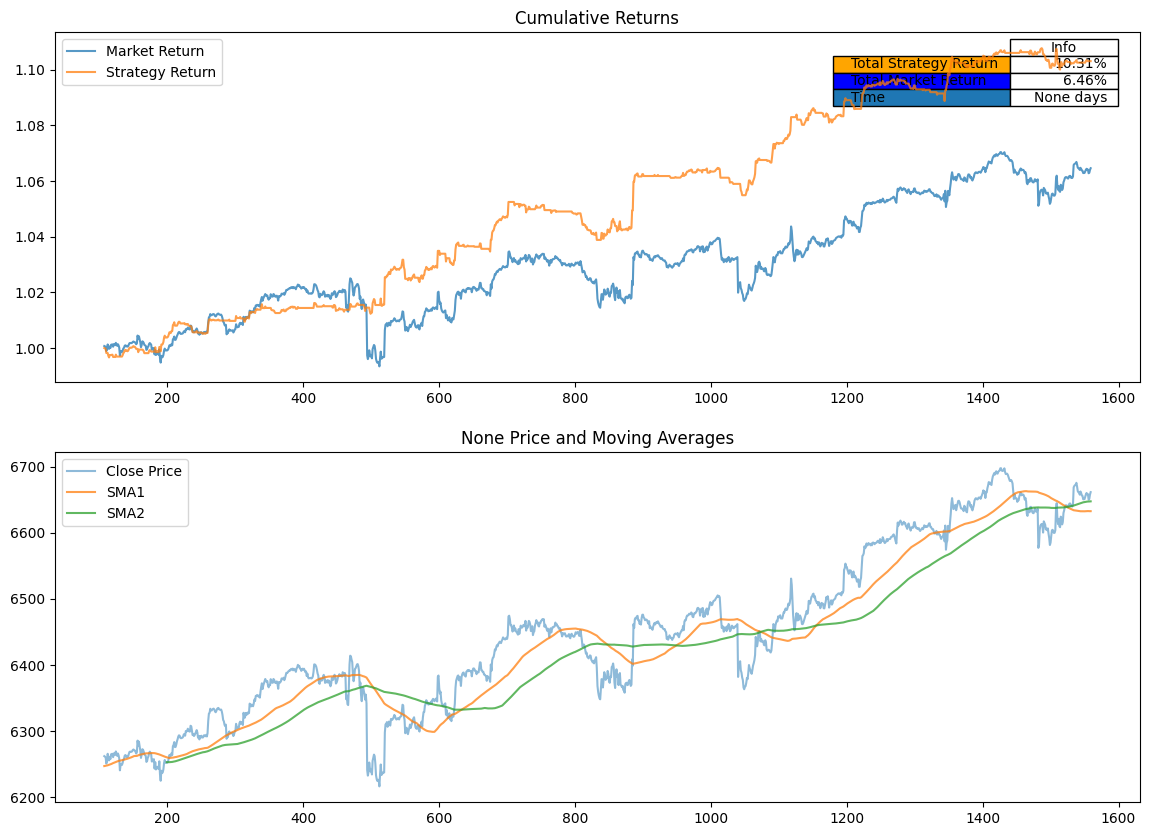

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,pp_strategy_gain,Cumulative Market Return,Cumulative Strategy Return
107,107,2025-07-11 14:15:00+00:00,6261.970215,6264.209961,6255.830078,6257.399902,95146792,2025-07-11,1415,6257.430176,...,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000726,1.000000
108,108,2025-07-11 14:30:00+00:00,6261.200195,6265.450195,6258.750000,6262.000000,88000877,2025-07-11,1430,6261.970215,...,2,-0.770020,0.000000,0.000000,-0.770020,-0.000123,-0.770020,-0.000123,1.000602,0.999877
109,109,2025-07-11 14:45:00+00:00,6260.109863,6261.140137,6254.669922,6261.140137,84624542,2025-07-11,1445,6261.200195,...,3,-1.090332,1.415980,0.000000,-1.860352,-0.000174,-1.860352,-0.000297,1.000428,0.999703
110,110,2025-07-11 15:00:00+00:00,6250.729980,6260.120117,6250.640137,6260.120117,84228200,2025-07-11,1500,6260.109863,...,4,-9.379883,5.041995,0.000000,-11.240234,-0.001498,-11.240234,-0.001795,0.998929,0.998205
111,111,2025-07-11 15:15:00+00:00,6254.660156,6259.259766,6249.180176,6250.229980,79099177,2025-07-11,1515,6250.729980,...,5,0.000000,-0.000000,0.000000,-11.240234,0.000000,-11.240234,-0.001795,0.999557,0.998205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,2025-09-29 18:45:00+00:00,6658.689941,6660.330078,6657.580078,6658.259766,78217000,2025-09-29,1845,6658.279785,...,5,0.000000,0.000000,5.359863,-2.120117,0.000000,3.239746,0.000487,1.064125,1.103092
1556,1556,2025-09-29 19:00:00+00:00,6650.479980,6658.810059,6649.959961,6658.750000,83195000,2025-09-29,1900,6658.689941,...,6,-0.000000,-0.000000,5.359863,-2.120117,-0.000000,3.239746,0.000487,1.062813,1.103092
1557,1557,2025-09-29 19:15:00+00:00,6651.359863,6653.669922,6644.490234,6650.509766,90601000,2025-09-29,1915,6650.479980,...,7,0.000000,0.000000,5.359863,-2.120117,0.000000,3.239746,0.000487,1.062954,1.103092
1558,1558,2025-09-29 19:30:00+00:00,6657.979980,6659.390137,6651.479980,6651.500000,112638000,2025-09-29,1930,6651.359863,...,8,0.000000,0.000000,5.359863,-2.120117,0.000000,3.239746,0.000487,1.064012,1.103092


In [70]:
try:
    importlib.reload(sys.modules['logics.performance_metrics'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.performance_metrics import performanceMetrics


strategy = 'sp500_15m'

params_dict = {}
#params_dict['interval'] = '15m'
#params_dict['days'] = 7
#params_dict['ticker'] = 'ĜSPC'

performancemetrics = performanceMetrics(inputs_dict = outputs_dict, params_dict=params_dict)
#performancemetrics = performanceMetrics(inputs_dict = outputs_dict)
performancemetrics.run()

outputs_dict = performancemetrics.outputs_dict
data_e_df = outputs_dict['data_e_df'].copy()
data_e_df

# Signal delivery

In [58]:
icols_ls = ['Datetime','Close', 'Open_adj', 'SMA1','sma1_diff', 'signal',
       'order_number', 'order_step', 'strategy_gain', 'pp_change_gain', 'order_gain_balance', 'order_loss_balance',
       'acum_strategy_gain', 'pp_strategy_gain','slope1','tendency',
       'current_return','strategy_return', 'Cumulative Market Return', 'Cumulative Strategy Return']


data_e_df[icols_ls].tail(30)

,Datetime,Close,Open_adj,SMA1,sma1_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,acum_strategy_gain,pp_strategy_gain,slope1,tendency,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
1529,2025-09-26 18:45:00+00:00,6644.390137,6644.419922,6636.636392,7.753745,1,235,2,-0.029785,0.000000,0.000000,-0.029785,-0.029785,-0.000004,1.913086,2,-0.000004,-0.000004,1.061840,1.102756
1530,2025-09-26 19:00:00+00:00,6640.410156,6644.390137,6636.098892,4.311265,1,235,3,-3.979980,133.622951,0.000000,-4.009766,-4.009766,-0.000603,-0.740967,-1,-0.000599,-0.000599,1.061204,1.102095
1531,2025-09-26 19:15:00+00:00,6641.830078,6640.410156,6635.568994,6.261084,0,235,4,1.419922,-0.354116,1.419922,-4.009766,-2.589844,-0.000390,-1.174951,-2,0.000214,0.000214,1.061431,1.102331
1532,2025-09-26 19:30:00+00:00,6639.910156,6641.830078,6634.990596,4.919561,0,235,5,-0.000000,0.000000,1.419922,-4.009766,-2.589844,-0.000390,-1.202002,-3,-0.000289,-0.000000,1.061124,1.102331
1533,2025-09-26 19:45:00+00:00,6643.540039,6639.910156,6634.503896,9.036143,0,235,6,0.000000,-0.000000,1.419922,-4.009766,-2.589844,-0.000390,0.746973,1,0.000547,0.000000,1.061704,1.102331
1534,2025-09-29 13:30:00+00:00,6668.919922,6643.540039,6634.301895,34.618027,1,236,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.489941,2,0.003820,0.000000,1.065760,1.102331
1535,2025-09-29 13:45:00+00:00,6671.089844,6668.919922,6634.120991,36.968853,1,236,2,2.169922,0.000000,2.169922,0.000000,2.169922,0.000325,11.891895,3,0.000325,0.000325,1.066107,1.102690
1536,2025-09-29 14:00:00+00:00,6672.250000,6671.089844,6633.947393,38.302607,1,236,3,1.160156,0.534653,3.330078,0.000000,3.330078,0.000499,8.829980,3,0.000174,0.000174,1.066292,1.102881
1537,2025-09-29 14:15:00+00:00,6673.129883,6672.250000,6633.799189,39.330693,1,236,4,0.879883,0.264223,4.209961,0.000000,4.209961,0.000631,1.379004,3,0.000132,0.000132,1.066433,1.103027
1538,2025-09-29 14:30:00+00:00,6675.819824,6673.129883,6633.707988,42.111836,1,236,5,2.689941,0.638947,6.899902,0.000000,6.899902,0.001035,1.506982,4,0.000403,0.000403,1.066863,1.103471


In [59]:
current_datetime = max(data_e_df['Datetime'])
signal_dt = current_datetime - timedelta(minutes=30)
signal_dt

Timestamp('2025-09-29 19:00:00+0000', tz='UTC')

In [10]:
try:
    importlib.reload(sys.modules['logics.deliver_last_signal'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.deliver_last_signal import deliverLastSignal

params_dict = {}
params_dict['strategy'] = strategy

deliverlastsignal = deliverLastSignal(inputs_dict = outputs_dict, params_dict=params_dict)
deliverlastsignal.run()

outputs_dict = deliverlastsignal.outputs_dict
last_signals_df = outputs_dict['last_signals_df'].copy()
last_signals_df

2025-09-29 08:35:02,395 - logics.deliver_last_signal - INFO - WU ->
Last stock date: 2025-09-29 13:30:00+00:00
Limit date: 2025-09-29 20:15:00+00:00
Current date: 2025-09-29 13:35:02.395398+00:00
/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df['Market Status'] = 'OPEN'
2025-09-29 08:35:02,402 - logics.deliver_last_signal - INFO - 
WU -> Last signal report:
                   Descripción                      Valor
0                     Datetime  2025-09-26 19:45:00+00:00
1                        Close                6643.540039
2                         SMA1                6634.503896
3                       slope1                   0.746973
4  

NO loaded libraries 'logics.deliver_last_signal'


,Datetime,Close,SMA1,slope1,signal,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,prev_signal,Action,Strategy
0,2025-09-26 19:15:00+00:00,6641.830078,6635.568994,-1.174951,0,1.419922,-2.589844,1.061431,1.102331,0.0,NA,sp500_15m
1,2025-09-26 19:30:00+00:00,6639.910156,6634.990596,-1.202002,0,-0.000000,-2.589844,1.061124,1.102331,0.0,NA,sp500_15m
2,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0,0.000000,-2.589844,1.061704,1.102331,0.0,NA,sp500_15m
3,2025-09-29 13:30:00+00:00,6670.500000,6634.317695,8.963965,1,0.000000,0.000000,1.066013,1.102331,0.0,BUY,sp500_15m


In [11]:
last_signal_df = outputs_dict['last_signal_df'].copy()
last_signal_df

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0.0,-2.589844,1.061704,1.102331,NA,sp500_15m,OPEN


In [12]:
last_signal = outputs_dict['last_signal'].copy()
last_signal

,Descripción,Valor
0,Datetime,2025-09-26 19:45:00+00:00
1,Close,6643.540039
2,SMA1,6634.503896
3,slope1,0.746973
4,strategy_gain,0.0
5,acum_strategy_gain,-2.589844
6,Cumulative Market Return,1.061704
7,Cumulative Strategy Return,1.102331
8,Action,NA
9,Strategy,sp500_15m


# Total strategy computation process

/home/user/Documents/trading/data/api_get_sp500_15m.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(self.ticker, interval=self.interval, period=self.period)
[*********************100%***********************]  1 of 1 completed
2025-09-27 00:26:52,745 - data.api_get_sp500_15m - INFO - 
WU -> Stock market data: (1548, 7)
2025-09-27 00:26:52,759 - data.api_get_sp500_15m - INFO - 
WU -> Last reported dates into the data:
          Date  candles              min_datetime              max_datetime  \
53  2025-09-18       26 2025-09-18 13:30:00+00:00 2025-09-18 19:45:00+00:00   
54  2025-09-19       26 2025-09-19 13:30:00+00:00 2025-09-19 19:45:00+00:00   
55  2025-09-22       26 2025-09-22 13:30:00+00:00 2025-09-22 19:45:00+00:00   
56  2025-09-23       26 2025-09-23 13:30:00+00:00 2025-09-23 19:45:00+00:00   
57  2025-09-24       26 2025-09-24 13:30:00+00:00 2025-09-24 19:45:00+00:00   
58  2025-09-25       26 2025-09-25 13:30:00+

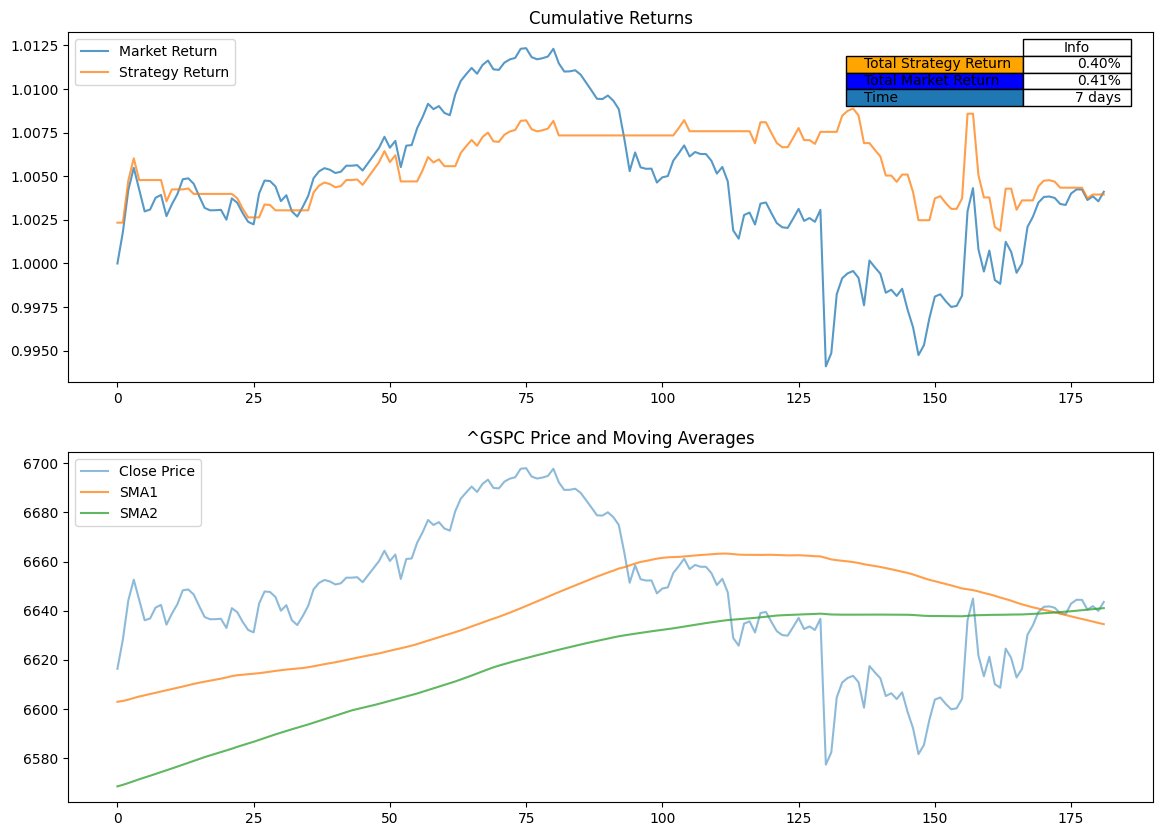

2025-09-27 00:26:54,114 - logics.deliver_last_signal - INFO - WU ->
Last stock date: 2025-09-26 19:45:00+00:00
Limit date: 2025-09-26 20:15:00+00:00
Current date: 2025-09-27 05:26:54.114910+00:00
/home/user/Documents/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df = last_signals_df.iloc[[-1]]
/home/user/Documents/trading/logics/deliver_last_signal.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df = last_signal_df.reset_index(drop=True)

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0.0,-2.589844,1.004111,1.003954,NA,sp500_15m,CLOSE


In [301]:
try:
    importlib.reload(sys.modules['SP500_15m_strategy'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()
sp50015mstrategy.run()
outputs_dict = sp50015mstrategy.outputs_dict
last_signal_df = outputs_dict['last_signal_df'].copy()
last_signal_df

# Send notification

## Send notification to whatsapp

In [302]:
last_signal = last_signal_df.T.reset_index().copy()
rencols_dict = {
    'index':'Descripción',
    1:'Valor',
}
last_signal = last_signal.rename(columns=rencols_dict).copy()
last_signal_tab = tabulate(last_signal, headers = 'keys', tablefmt = 'pretty', showindex=False, colalign=("left", "right"))
last_signal_tab = '```' + last_signal_tab + '```'
last_signal_tab

'```+----------------------------+---------------------------+\n| Descripción                |                         0 |\n+----------------------------+---------------------------+\n| Datetime                   | 2025-09-26 19:45:00+00:00 |\n| Close                      |           6643.5400390625 |\n| SMA1                       |         6634.503896484375 |\n| slope1                     |        0.7469726562501364 |\n| strategy_gain              |                       0.0 |\n| acum_strategy_gain         |               -2.58984375 |\n| Cumulative Market Return   |        1.0041110638139592 |\n| Cumulative Strategy Return |        1.0039538253683746 |\n| Action                     |                        NA |\n| Strategy                   |                 sp500_15m |\n| Market Status              |                     CLOSE |\n+----------------------------+---------------------------+```'

In [305]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()

recepient_phone_number = '573104888469'
msg_body = last_signal_tab

whatsappconnection.send_message(msg_body = msg_body, recepient_phone_number=recepient_phone_number)


{"messaging_product":"whatsapp","contacts":[{"input":"573104888469","wa_id":"573104888469"}],"messages":[{"id":"wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSNkQ2MTEyRUVBOEZEMUI5MDA0AA=="}]}


In [304]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()

whatsappconnection.send_image(recepient_phone_number=recepient_phone_number, image_buffer = imagebuffer)

{'id': '31538807469099117'}
{'messaging_product': 'whatsapp', 'contacts': [{'input': '573104888469', 'wa_id': '573104888469'}], 'messages': [{'id': 'wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSODc5QUY5Qjg0QjBGQ0M2MzUzAA=='}]}


## Send notifications to telegram

In [265]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

chat_id = telegramconnection.get_group_chat_id()
chat_id

-4948600790

In [270]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

imagebuffer = imagebuffer
market_status_tab2 = tabulate(last_signal, headers = 'keys', tablefmt = 'pretty', showindex=False, colalign=("left", "right"))
message_text = '<pre>' + market_status_tab2 + '</pre>'

telegramconnection.send_image(imagebuffer=imagebuffer, message_text = message_text)

2025-09-26 21:50:42,015 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 18, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758941441, 'photo': [{'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAANzAAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZ4', 'file_size': 767, 'width': 90, 'height': 64}, {'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAANtAAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZy', 'file_size': 11323, 'width': 320, 'height': 228}, {'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAAN4AAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZ9', '

In [188]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

chat_id = telegramconnection.send_message(message_text = message_text)
chat_id

2025-09-26 17:55:33,484 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 13, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758927333, 'text': '+----------------------------+---------------------------+\n| Descripción                |                     Valor |\n+----------------------------+---------------------------+\n| Datetime                   | 2025-09-26 15:00:00+00:00 |\n| Close                      |           6608.6298828125 |\n| SMA1                       |         6645.333583984375 |\n| slope1                     |       -2.5169921874996817 |\n| signal                     |                         1 |\n| Cumulative Market Return

## Total notification sending

In [269]:
try:
    importlib.reload(sys.modules['SP500_15m_strategy'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()

sp50015mstrategy.send_notification(inputs_dict = outputs_dict)

{"messaging_product":"whatsapp","contacts":[{"input":"573104888469","wa_id":"573104888469"}],"messages":[{"id":"wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSRTM3NDA5QTdENTNFQzc1NUUyAA=="}]}
{'id': '1316954893132229'}
{'messaging_product': 'whatsapp', 'contacts': [{'input': '573104888469', 'wa_id': '573104888469'}], 'messages': [{'id': 'wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSQTM2OTE0MDAyQzFBQTlBNzVGAA=='}]}


2025-09-26 21:50:10,915 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 17, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758941410, 'photo': [{'file_id': 'AgACAgEAAxkDAAMOaNdPRfr9GSzTnlZXPrEoiLTQ-60AAkULaxtTcrlGtTTX6rTV7nQBAAMCAANzAAM2BA', 'file_unique_id': 'AQADRQtrG1NyuUZ4', 'file_size': 772, 'width': 90, 'height': 64}, {'file_id': 'AgACAgEAAxkDAAMOaNdPRfr9GSzTnlZXPrEoiLTQ-60AAkULaxtTcrlGtTTX6rTV7nQBAAMCAANtAAM2BA', 'file_unique_id': 'AQADRQtrG1NyuUZy', 'file_size': 11306, 'width': 320, 'height': 228}, {'file_id': 'AgACAgEAAxkDAAMOaNdPRfr9GSzTnlZXPrEoiLTQ-60AAkULaxtTcrlGtTTX6rTV7nQBAAMCAAN4AAM2BA', 'file_unique_id': 'AQADRQtrG1NyuUZ9', '

# Total process

2025-09-29 15:53:21,697 - helpers.additional_functionalities - INFO - WU-> Function (getConnsStr.run) start!)
2025-09-29 15:53:21,699 - helpers.additional_functionalities - INFO - WU-> Function (getConnsStr.get_connection_app_info) start!)
2025-09-29 15:53:21,700 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.run) start!)
2025-09-29 15:53:21,702 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.get_service) start!)
2025-09-29 15:53:21,749 - googleapiclient.discovery_cache - INFO - file_cache is only supported with oauth2client<4.0.0
2025-09-29 15:53:21,752 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.get_service) processed! (elapsed minutes: 0.001)
2025-09-29 15:53:21,753 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.run) processed! (elapsed minutes: 0.001)
2025-09-29 15:53:21,754 - helpers.additional_functionalities - INFO - WU-> Function (gdConnection.download_excel_file) start

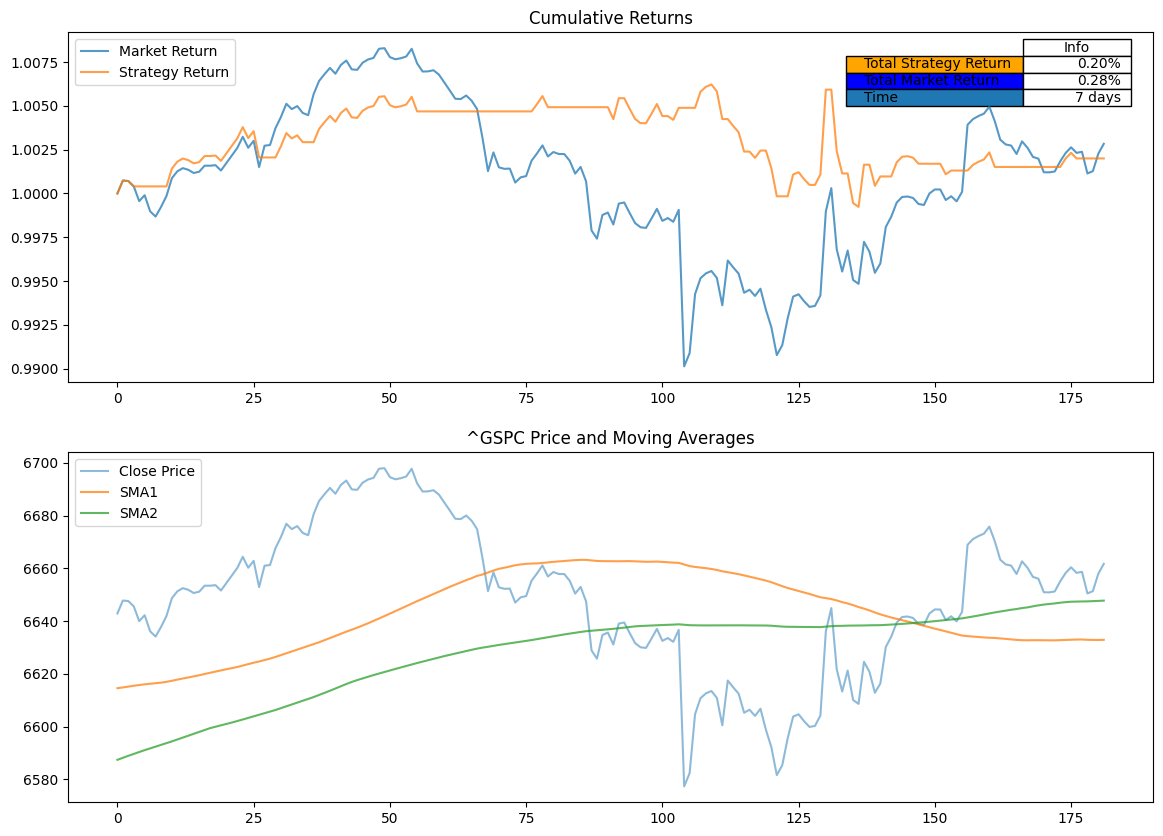

2025-09-29 15:53:41,079 - logics.deliver_last_signal - INFO - WU ->
Last stock date: 2025-09-29 19:45:00+00:00
Limit date: 2025-09-29 20:15:00+00:00
Current date: 2025-09-29 20:53:41.079826+00:00
/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df['Market Status'] = 'OPEN'
/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l

{"messaging_product":"whatsapp","contacts":[{"input":"573104888469","wa_id":"573104888469"}],"messages":[{"id":"wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSMEJDOENBMDlGMzc2Nzk3NjlCAA=="}]}
{'id': '1424023408657064'}
{'messaging_product': 'whatsapp', 'contacts': [{'input': '573104888469', 'wa_id': '573104888469'}], 'messages': [{'id': 'wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSNUQ3RDk1NDUwRTE1OTVBQ0Y5AA=='}]}


2025-09-29 15:53:46,535 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 74, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1759179226, 'photo': [{'file_id': 'AgACAgEAAxkDAANKaNrx2g5R7rdTCkeRLisGRcMhMvsAAm8Laxtv59lGLOE3022s2gEBAAMCAANzAAM2BA', 'file_unique_id': 'AQADbwtrG2_n2UZ4', 'file_size': 775, 'width': 90, 'height': 64}, {'file_id': 'AgACAgEAAxkDAANKaNrx2g5R7rdTCkeRLisGRcMhMvsAAm8Laxtv59lGLOE3022s2gEBAAMCAANtAAM2BA', 'file_unique_id': 'AQADbwtrG2_n2UZy', 'file_size': 11301, 'width': 320, 'height': 228}, {'file_id': 'AgACAgEAAxkDAANKaNrx2g5R7rdTCkeRLisGRcMhMvsAAm8Laxtv59lGLOE3022s2gEBAAMCAAN4AAM2BA', 'file_unique_id': 'AQADbwtrG2_n2UZ9', '

In [80]:
try:
    importlib.reload(sys.modules['logics.deliver_last_signal'])
    importlib.reload(sys.modules['SP500_15m_strategy'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()
sp50015mstrategy.run()

outputs_dict = sp50015mstrategy.outputs_dict
sp50015mstrategy.send_notification(inputs_dict = outputs_dict)

In [283]:
outputs_dict = sp50015mstrategy.outputs_dict
outputs_dict.keys()

dict_keys(['stock_df', 'data_e2_df', 'data_e_df', 'imagebuffer', 'last_signals_df', 'last_signal_df'])

In [284]:

last_signal_df

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0.0,-2.589844,1.004111,1.003954,NA,sp500_15m,CLOSE


In [285]:

if market_status != 'CLOSE'

0    CLOSE
Name: Market Status, dtype: object

# Observations

In [36]:
icols_ls = ['Datetime','Close', 'Open_adj', 'SMA1','sma1_diff', 'signal',
       'order_number', 'order_step', 'strategy_gain', 'pp_change_gain', 'order_gain_balance', 'order_loss_balance',
       'acum_strategy_gain', 'pp_strategy_gain','slope1','tendency',
       'current_return','strategy_return', 'Cumulative Market Return', 'Cumulative Strategy Return']

#data_e_df[icols_ls]

data_e_df[
    #data_e_df['order_number'].isin([1,2])
    #data_e2_df['order_number'].isin([69,70])
    #data_e2_df['signal']==-1
    (data_e_df['index']>=350)&(data_e_df['index']<=400)
][icols_ls]

,Datetime,Close,Open_adj,SMA1,sma1_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,acum_strategy_gain,pp_strategy_gain,slope1,tendency,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
350,2025-07-21 19:30:00+00:00,6309.370117,6314.839844,6291.810010,17.560107,0,34,12,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-4.652002,-6,-0.000866,-0.000000,1.013101,1.014203
351,2025-07-21 19:45:00+00:00,6307.459961,6309.370117,6292.426709,15.033252,0,34,13,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-3.307031,-6,-0.000303,-0.000000,1.012794,1.014203
352,2025-07-22 13:30:00+00:00,6309.669922,6307.459961,6293.075410,16.594512,0,34,14,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-1.741992,-6,0.000350,0.000000,1.013149,1.014203
353,2025-07-22 13:45:00+00:00,6288.279785,6309.669922,6293.534507,-5.254722,0,34,15,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-6.106104,-7,-0.003390,-0.000000,1.009715,1.014203
354,2025-07-22 14:00:00+00:00,6291.040039,6288.279785,6293.903906,-2.863867,0,34,16,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-7.064990,-8,0.000439,0.000000,1.010158,1.014203
355,2025-07-22 14:15:00+00:00,6290.879883,6291.040039,6294.469204,-3.589321,0,34,17,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-5.360986,-8,-0.000025,-0.000000,1.010132,1.014203
356,2025-07-22 14:30:00+00:00,6297.319824,6290.879883,6295.195303,2.124521,1,35,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.695996,1,0.001024,0.000000,1.011166,1.014203
357,2025-07-22 14:45:00+00:00,6299.310059,6297.319824,6295.789502,3.520557,1,35,2,1.990234,0.000000,1.990234,0.000000,1.990234,0.000316,3.125000,2,0.000316,0.000316,1.011486,1.014524
358,2025-07-22 15:00:00+00:00,6296.459961,6299.310059,6296.391104,0.068857,0,35,3,-2.850098,-1.432041,1.990234,-2.850098,-0.859863,-0.000137,1.873047,2,-0.000452,-0.000452,1.011028,1.014065
359,2025-07-22 15:15:00+00:00,6296.979980,6296.459961,6296.987202,-0.007222,0,35,4,0.000000,-0.000000,1.990234,-2.850098,-0.859863,-0.000137,-0.386963,-1,0.000083,0.000000,1.011112,1.014065
